# Dense Neural Networks Versjon 1.0

Forsøke å benytte noe jeg akkurat har lært meg.

#### Importering av biblioteker

In [2]:
import pandas as pd
import numpy as np

# Visualization
#import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

#### Innlasting av datasett

In [3]:
# TEK (1. Spetember til 18. Desember)
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False)
    #df_tek.info()

# TEK (delayed 2 hours)
df_tek_delayed = pd.read_csv('vindkraft 181217 TEK met delayed.csv',sep =',', low_memory = False)
    #df_tek_delayed.info()

# AROME Værdata (1. Spetember til 18. Desember)
df_arome = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False)
    #df_arome.info()

#### Samling av datasett

In [4]:
df = pd.concat([df_arome['/arome_airtemp_6491_1087'],
                df_arome['/arome_airpress_6491_1087'], 
                df_arome['/arome_winddir_6491_1087'],
                df_arome['/arome_windvel_6491_1087'],
                df_tek['YVIK-YtreVikna1-Sum-produksjon']
               ], 
               axis = 1)

In [ ]:
#df.head(2)

#### Vaske sammenstilt datasett

In [5]:
cleaned_dataframe = df.dropna()

In [6]:
cleaned_dataframe.columns

Index(['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087',
       '/arome_winddir_6491_1087', '/arome_windvel_6491_1087',
       'YVIK-YtreVikna1-Sum-produksjon'],
      dtype='object')

In [ ]:
# Grafisk visualisering utgår. se heller Lineær Regresjon Versjon 1.0

#### Dele datasett i et X- og Y-datasett

In [7]:
x = cleaned_dataframe[['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087','/arome_winddir_6491_1087', '/arome_windvel_6491_1087']]
y = cleaned_dataframe['YVIK-YtreVikna1-Sum-produksjon']

#### Train/Test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#### Skalere feature data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [14]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

### Lage og trene modellen ( TensorFlow )

In [15]:
import tensorflow as tf

#### Lage feature columns

In [16]:
cleaned_dataframe.columns

Index(['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087',
       '/arome_winddir_6491_1087', '/arome_windvel_6491_1087',
       'YVIK-YtreVikna1-Sum-produksjon'],
      dtype='object')

In [17]:
airtemp = tf.feature_column.numeric_column('/arome_airtemp_6491_1087')
airpress = tf.feature_column.numeric_column('/arome_airpress_6491_1087')
winddir = tf.feature_column.numeric_column('/arome_winddir_6491_1087')
windvel = tf.feature_column.numeric_column('/arome_windvel_6491_1087')

In [18]:
feat_cols = [airtemp,airpress,winddir,windvel]

#### Create the input function for the estimator object. (play around with batch_size and num_epochs)

In [44]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=20,num_epochs=1000,
                                            shuffle=True)

#### Create the estimator model. Use a DNNRegressor. Play around with the hidden units!

In [45]:
model = tf.estimator.DNNRegressor(hidden_units=[4,10,10,10,10],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\chris\\AppData\\Local\\Temp\\tmp625n42cw', '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_save_summary_steps': 100}


#### Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement)

In [53]:
model.train(input_fn=input_func,steps=50000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\chris\AppData\Local\Temp\tmp625n42cw\model.ckpt-10000
INFO:tensorflow:Saving checkpoints for 10001 into C:\Users\chris\AppData\Local\Temp\tmp625n42cw\model.ckpt.
INFO:tensorflow:step = 10001, loss = 1527.79
INFO:tensorflow:global_step/sec: 740.855
INFO:tensorflow:step = 10101, loss = 1231.88 (0.151 sec)
INFO:tensorflow:global_step/sec: 739.388
INFO:tensorflow:step = 10201, loss = 906.024 (0.135 sec)
INFO:tensorflow:global_step/sec: 750.04
INFO:tensorflow:step = 10301, loss = 826.394 (0.118 sec)
INFO:tensorflow:global_step/sec: 848.155
INFO:tensorflow:step = 10401, loss = 1671.33 (0.135 sec)
INFO:tensorflow:global_step/sec: 755.45
INFO:tensorflow:step = 10501, loss = 2466.06 (0.115 sec)
INFO:tensorflow:global_step/sec: 844.098
INFO:tensorflow:step = 10601, loss = 784.219 (0.118 sec)
INFO:tensorflow:global_step/sec: 862.286
INFO:tensorflow:step = 10701, loss = 1189.53 (0.132 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 847.444
INFO:tensorflow:step = 18201, loss = 844.662 (0.118 sec)
INFO:tensorflow:global_step/sec: 755.442
INFO:tensorflow:step = 18301, loss = 1205.9 (0.135 sec)
INFO:tensorflow:global_step/sec: 804.308
INFO:tensorflow:step = 18401, loss = 1565.33 (0.124 sec)
INFO:tensorflow:global_step/sec: 767.184
INFO:tensorflow:step = 18501, loss = 537.245 (0.130 sec)
INFO:tensorflow:global_step/sec: 838.103
INFO:tensorflow:step = 18601, loss = 1073.36 (0.119 sec)
INFO:tensorflow:global_step/sec: 760.958
INFO:tensorflow:step = 18701, loss = 825.252 (0.132 sec)
INFO:tensorflow:global_step/sec: 788.992
INFO:tensorflow:step = 18801, loss = 1874.96 (0.123 sec)
INFO:tensorflow:global_step/sec: 740.808
INFO:tensorflow:step = 18901, loss = 1267.88 (0.138 sec)
INFO:tensorflow:global_step/sec: 862.576
INFO:tensorflow:step = 19001, loss = 821.87 (0.113 sec)
INFO:tensorflow:global_step/sec: 853.158
INFO:tensorflow:step = 19101, loss = 2354.57 (0.117 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 756.232
INFO:tensorflow:step = 26601, loss = 685.711 (0.132 sec)
INFO:tensorflow:global_step/sec: 854.819
INFO:tensorflow:step = 26701, loss = 763.358 (0.117 sec)
INFO:tensorflow:global_step/sec: 833.677
INFO:tensorflow:step = 26801, loss = 924.286 (0.120 sec)
INFO:tensorflow:global_step/sec: 881.204
INFO:tensorflow:step = 26901, loss = 614.332 (0.129 sec)
INFO:tensorflow:global_step/sec: 744.186
INFO:tensorflow:step = 27001, loss = 579.181 (0.119 sec)
INFO:tensorflow:global_step/sec: 875.605
INFO:tensorflow:step = 27101, loss = 1372.04 (0.114 sec)
INFO:tensorflow:global_step/sec: 853.94
INFO:tensorflow:step = 27201, loss = 878.112 (0.117 sec)
INFO:tensorflow:global_step/sec: 850.948
INFO:tensorflow:step = 27301, loss = 527.683 (0.118 sec)
INFO:tensorflow:global_step/sec: 752.883
INFO:tensorflow:step = 27401, loss = 653.611 (0.133 sec)
INFO:tensorflow:global_step/sec: 748.714
INFO:tensorflow:step = 27501, loss = 1080.77 (0.134 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 862.867
INFO:tensorflow:step = 35001, loss = 1416.05 (0.116 sec)
INFO:tensorflow:global_step/sec: 869.363
INFO:tensorflow:step = 35101, loss = 911.784 (0.115 sec)
INFO:tensorflow:global_step/sec: 856.274
INFO:tensorflow:step = 35201, loss = 860.393 (0.117 sec)
INFO:tensorflow:global_step/sec: 751.159
INFO:tensorflow:step = 35301, loss = 1060.98 (0.133 sec)
INFO:tensorflow:global_step/sec: 861.485
INFO:tensorflow:step = 35401, loss = 1102.21 (0.116 sec)
INFO:tensorflow:global_step/sec: 741.934
INFO:tensorflow:step = 35501, loss = 991.152 (0.135 sec)
INFO:tensorflow:global_step/sec: 754.179
INFO:tensorflow:step = 35601, loss = 987.933 (0.133 sec)
INFO:tensorflow:global_step/sec: 847.726
INFO:tensorflow:step = 35701, loss = 1460.23 (0.118 sec)
INFO:tensorflow:global_step/sec: 848.172
INFO:tensorflow:step = 35801, loss = 1357.85 (0.118 sec)
INFO:tensorflow:global_step/sec: 756.289
INFO:tensorflow:step = 35901, loss = 744.125 (0.132 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 861.177
INFO:tensorflow:step = 43401, loss = 708.646 (0.116 sec)
INFO:tensorflow:global_step/sec: 858.324
INFO:tensorflow:step = 43501, loss = 1961.44 (0.117 sec)
INFO:tensorflow:global_step/sec: 858.948
INFO:tensorflow:step = 43601, loss = 917.453 (0.116 sec)
INFO:tensorflow:global_step/sec: 783.94
INFO:tensorflow:step = 43701, loss = 1027.22 (0.132 sec)
INFO:tensorflow:global_step/sec: 722.772
INFO:tensorflow:step = 43801, loss = 429.037 (0.137 sec)
INFO:tensorflow:global_step/sec: 846.472
INFO:tensorflow:step = 43901, loss = 555.144 (0.115 sec)
INFO:tensorflow:global_step/sec: 846.836
INFO:tensorflow:step = 44001, loss = 1746.35 (0.134 sec)
INFO:tensorflow:global_step/sec: 739.606
INFO:tensorflow:step = 44101, loss = 1126.05 (0.120 sec)
INFO:tensorflow:global_step/sec: 880.269
INFO:tensorflow:step = 44201, loss = 2174.21 (0.129 sec)
INFO:tensorflow:global_step/sec: 737.867
INFO:tensorflow:step = 44301, loss = 527.206 (0.120 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 817.493
INFO:tensorflow:step = 51801, loss = 1285.17 (0.120 sec)
INFO:tensorflow:global_step/sec: 954.058
INFO:tensorflow:step = 51901, loss = 663.117 (0.102 sec)
INFO:tensorflow:global_step/sec: 765.803
INFO:tensorflow:step = 52001, loss = 1150.82 (0.131 sec)
INFO:tensorflow:global_step/sec: 985.953
INFO:tensorflow:step = 52101, loss = 1037.55 (0.117 sec)
INFO:tensorflow:global_step/sec: 752.394
INFO:tensorflow:step = 52201, loss = 2147.06 (0.121 sec)
INFO:tensorflow:global_step/sec: 985.108
INFO:tensorflow:step = 52301, loss = 953.865 (0.098 sec)
INFO:tensorflow:global_step/sec: 804.717
INFO:tensorflow:step = 52401, loss = 567.347 (0.124 sec)
INFO:tensorflow:global_step/sec: 910.139
INFO:tensorflow:step = 52501, loss = 1718.45 (0.125 sec)
INFO:tensorflow:global_step/sec: 862.935
INFO:tensorflow:step = 52601, loss = 1626.16 (0.116 sec)
INFO:tensorflow:global_step/sec: 753.937
INFO:tensorflow:step = 52701, loss = 988.517 (0.117 sec)
INFO:tensorflow:glob

#### Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data.

In [54]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [55]:
pred_gen = model.predict(predict_input_func)

In [56]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from C:\Users\chris\AppData\Local\Temp\tmp625n42cw\model.ckpt-60000


#### Calculate the RMSE. Do this manually or use sklearn.metrics

In [27]:
from sklearn import metrics

In [57]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [51]:
# 1000 treningsrunder [4,4,4]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 5.9377164611
Mean Squared Error: 			 59.9907126824
Root Mean Squared Error: 		 7.74536717544


In [36]:
# 10 000 treningsomganger [4,4,4]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 6.25466493941
Mean Squared Error: 			 63.5783659755
Root Mean Squared Error: 		 7.97360432775


In [43]:
# 10 000 treningsomganger [4,6,8,6,4]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 6.15160234965
Mean Squared Error: 			 62.0314108274
Root Mean Squared Error: 		 7.87600221098


In [52]:
# 10 000 treningsomganger [4,10,10,10,10]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 5.9377164611
Mean Squared Error: 			 59.9907126824
Root Mean Squared Error: 		 7.74536717544


In [58]:
# 50 000 treningsomganger [4,10,10,10,10]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 5.81186851558
Mean Squared Error: 			 59.4974001067
Root Mean Squared Error: 		 7.71345578238


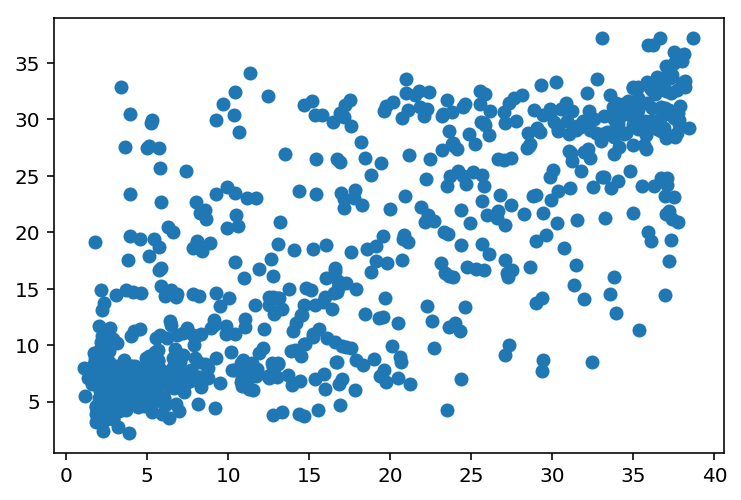

In [59]:
# Burde følge en rett linje

plt.scatter(y_test,final_preds)

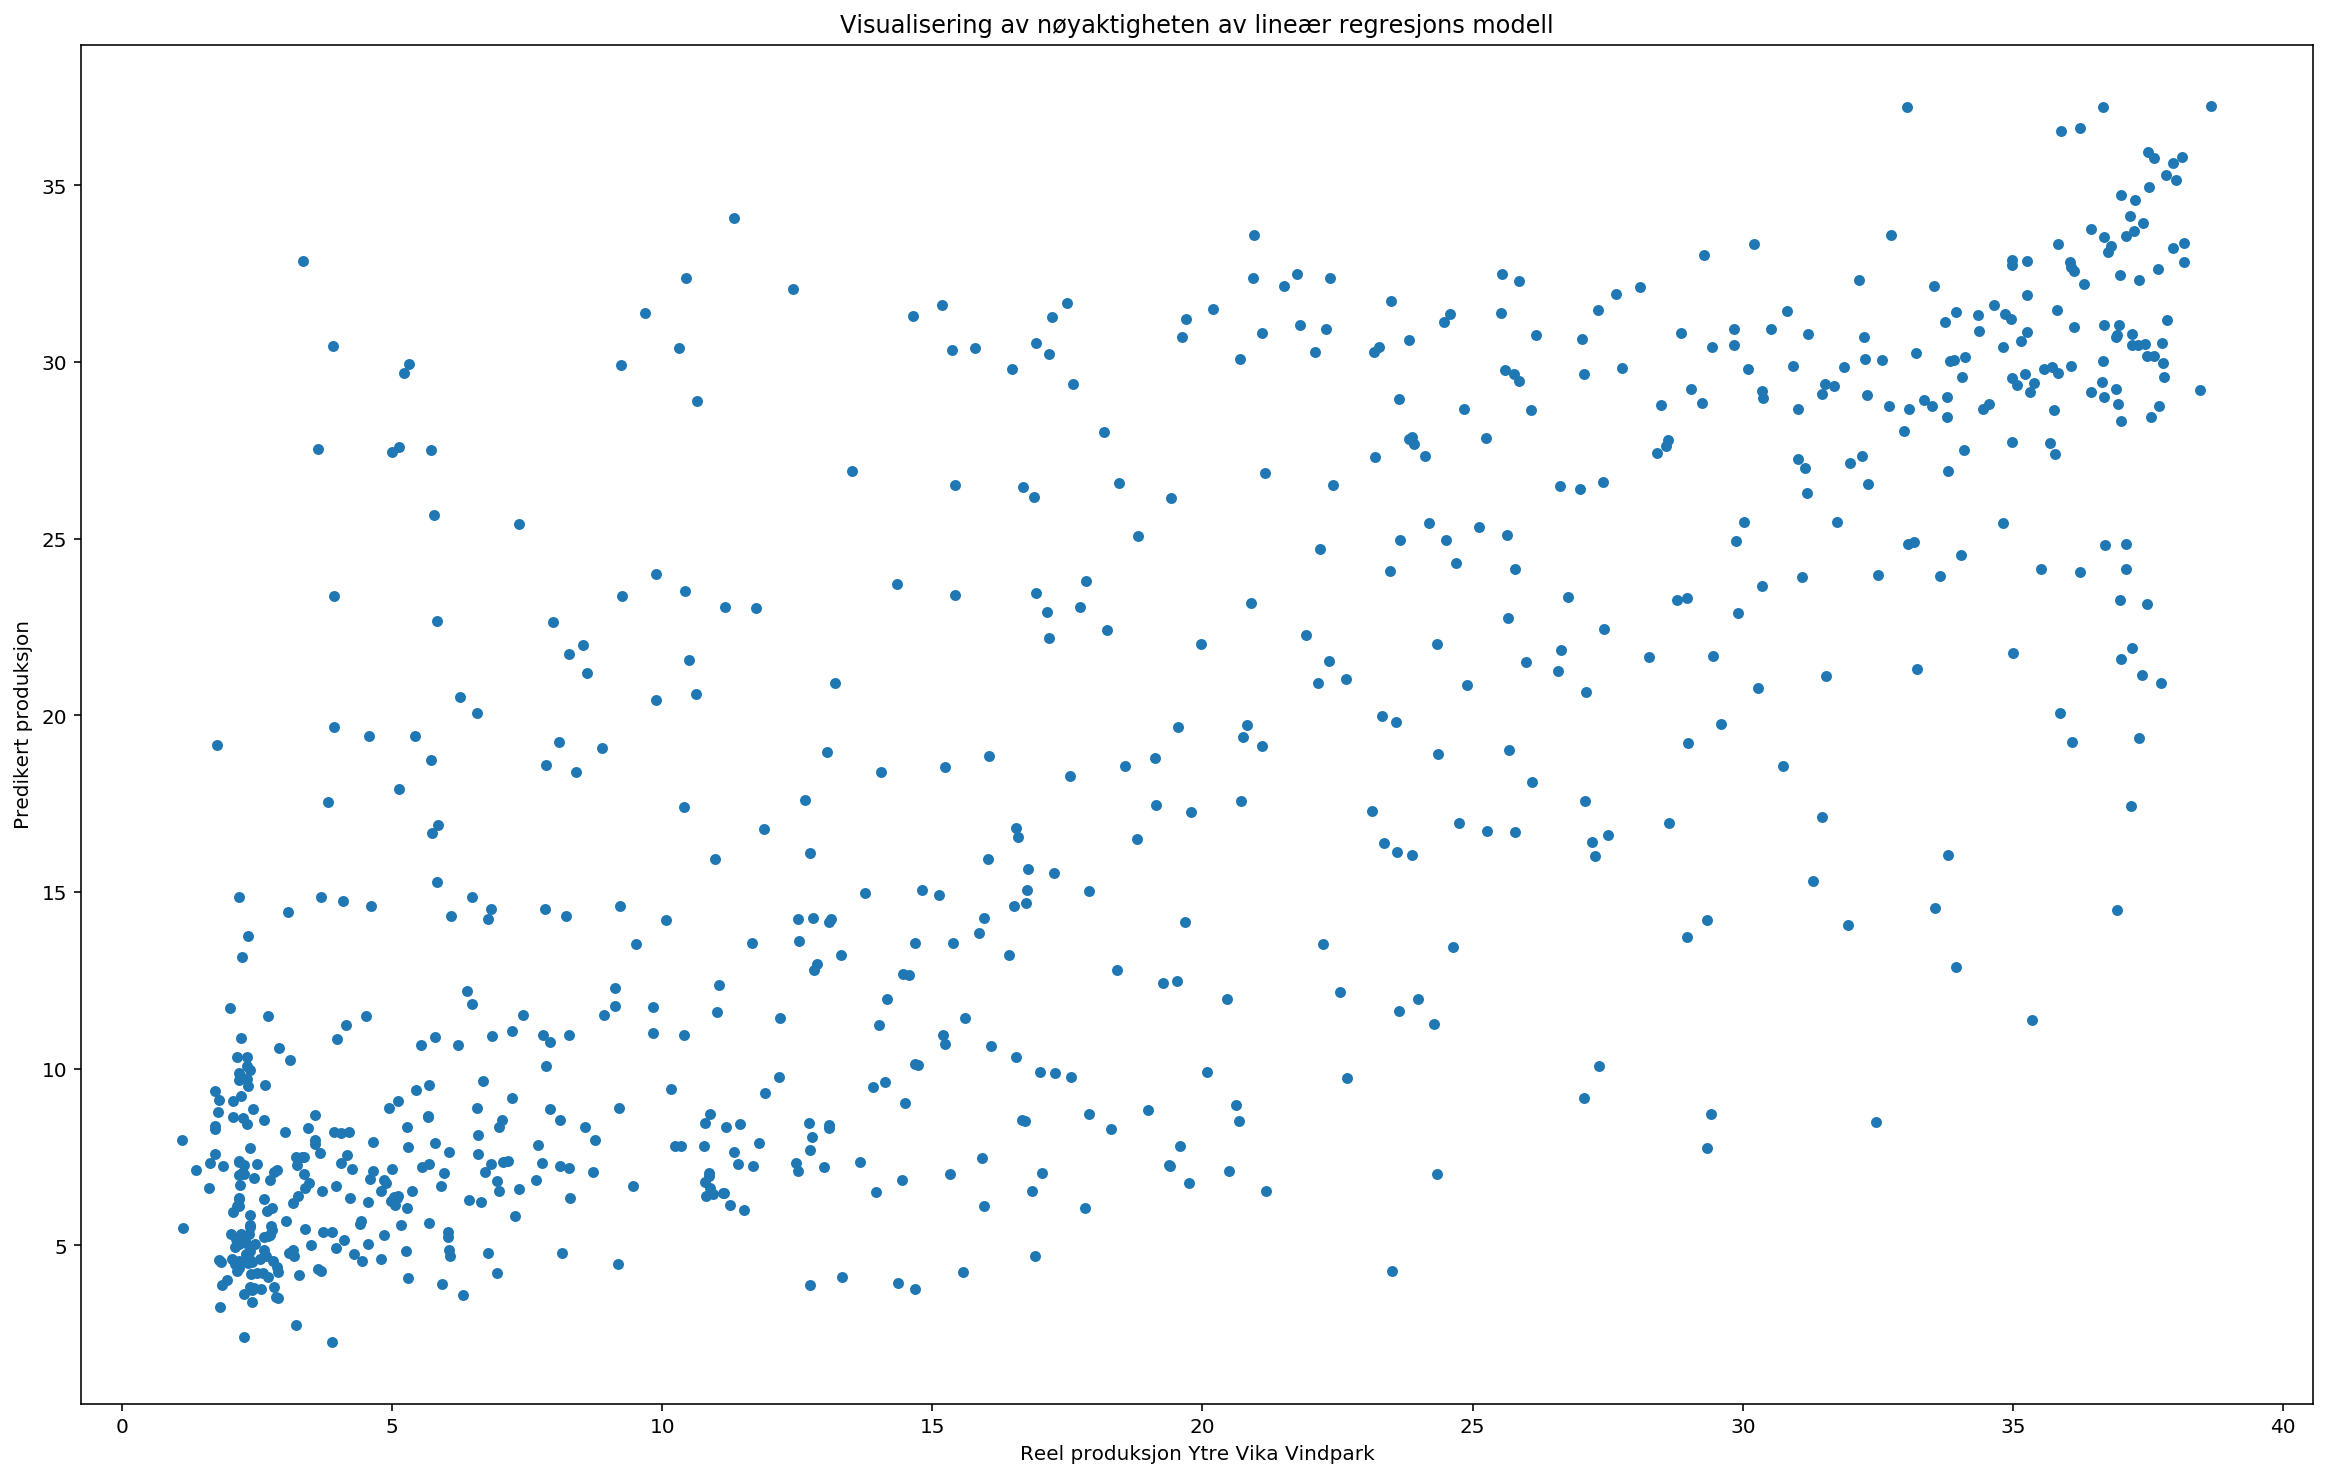

In [62]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av lineær regresjons modell')